# Método de Runge-Kutta de orden 4 (RK4) con visualización usando Matplotlib


Este notebook implementa el método de Runge-Kutta de cuarto orden (RK4) para resolver una ecuación diferencial de segundo orden, y visualiza los resultados usando `matplotlib` en Google Colab.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Inicialización
a = 0.
b = 10.
n = 1000
y = np.zeros(2)
t = a
h = (b - a) / n
y[0] = 3.
y[1] = -5.

# Función fuerza
def f(t, y):
    f_return = np.zeros(2)
    f_return[0] = y[1]
    f_return[1] = -100. * y[0] - 2. * y[1] + 10. * np.sin(3. * t)
    return f_return



## Función del método RK4

Esta función implementa una sola iteración del método de Runge-Kutta de orden 4 para sistemas de ecuaciones diferenciales.


In [ ]:

def rk4(t, h, y):
    k1 = h * f(t, y)
    k2 = h * f(t + h / 2., y + k1 / 2.)
    k3 = h * f(t + h / 2., y + k2 / 2.)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.



## Bucle principal de integración

En este bloque se realiza la integración desde `a` hasta `b`, almacenando los valores de `y[0]` y `y[1]` en cada paso.


In [ ]:

t_values = []
y0_values = []
y1_values = []

while t < b:
    if (t + h) > b:
        h = b - t
    y = rk4(t, h, y)
    t = t + h

    t_values.append(t)
    y0_values.append(y[0])
    y1_values.append(y[1])


## Visualización de resultados

Se grafican `y(t)` y `y'(t)` usando Matplotlib.


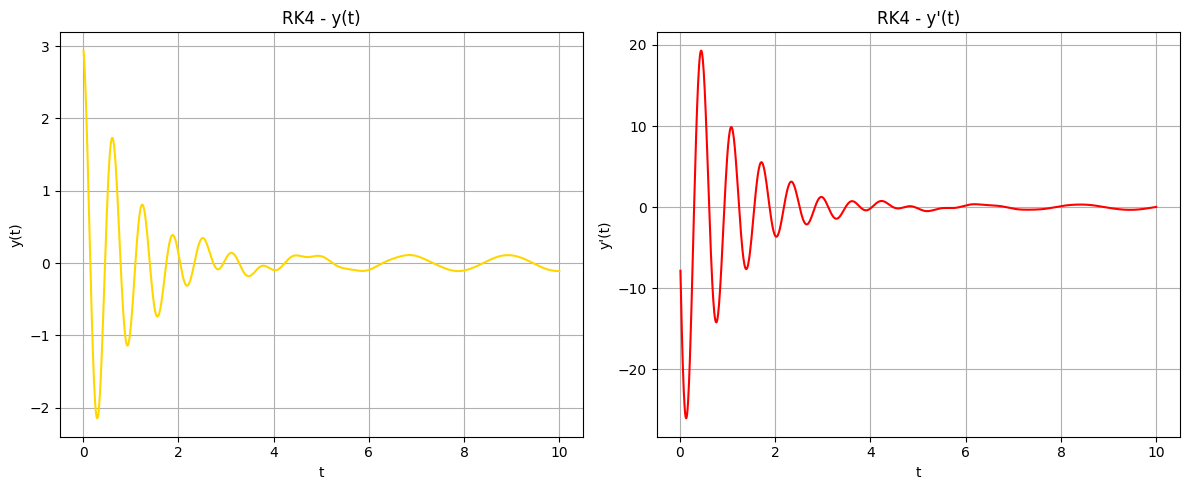

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(t_values, y0_values, color='gold')
plt.title("RK4 - y(t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_values, y1_values, color='red')
plt.title("RK4 - y'(t)")
plt.xlabel("t")
plt.ylabel("y'(t)")
plt.grid(True)

plt.tight_layout()
plt.show()
